# EDA - Exploratory data analysis
So as an initial step im going to open up the data
and have a look around... (yeah i'll try and fit it also)

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import l1_min_c
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
training_data = pd.read_csv('../data/train.csv', index_col=0)
test_data = pd.read_csv('../data/test.csv', index_col=0)

print('samples:', len(training_data))
print('dimensions: ', len(training_data.columns) - 1)

training_data.describe()

samples: 250
dimensions:  300


,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,-0.036920,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,0.963688,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,-2.768000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,-0.689500,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,-0.012500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,0.635000,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,2.512000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


more dimensions than samples.. 
300 dimensions... maybe too many for a histogram table, messy trying to describe!

In [105]:
scaler = StandardScaler()

Y = training_data.loc[:, 'target'].values
X = training_data.drop('target', axis=1).values

X = scaler.fit_transform(X)
Y = Y.ravel()

In [106]:
test = test_data.values
test = scaler.transform(test)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
print(len(X_train))
print(len(X_test))
scores = []
#index = np.arange(0.01, 1, .1)
#for i in index:
log_model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=.1, solver='liblinear')

log_model.fit(X_train, y_train)
print(log_model.score(X_test, y_test))
    
#plt.plot(index, scores)

#index[np.argmax(scores)]
#output = pd.Series(index=test_data.index, data=log_model.predict(X_test), name='target')
#output.to_csv('../results/log_submission.csv', header='id')


125
125
0.64


In [175]:
scores

[0.3]

10
20
30
40


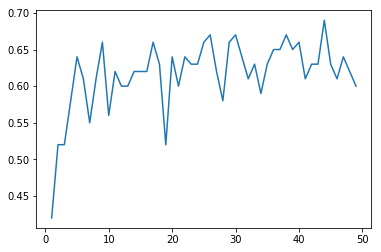

In [154]:
from sklearn.ensemble import RandomForestClassifier

#split the data into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

estimators = round(300**1/2)
add = []
i_vals = range(1, 50, 1)
for i in i_vals:
    clf = RandomForestClassifier(n_estimators=i, max_depth=5)
    clf = clf.fit(X_train, y_train)
    add.append(clf.score(X_test, y_test))
    if i % 10 == 0:
        print(i)

plt.plot(i_vals, add)
#output = pd.Series(index=test_data.index, data=clf.predict(X_test), name='target')
#output.to_csv('../results/rfc_submission.csv', header='id')


In [45]:
from sklearn.svm import LinearSVC, SVC
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
print(len(X_train))
print(len(X_test))
lsvc_model = LinearSVC(tol=1e-5, C=0.1)
lsvc_model.fit(X_train, y_train)
print('linear SVC score: ', lsvc_model.score(X_test, y_test))

cs = [0.1, 1, 10, 100, 1000]
for gamma in cs:
    #svc = svm.SVC(kernel=kernel).fit(X, y)
    svc_model = SVC(C=gamma, kernel='poly', degree=2000, gamma=0.1)
    svc_model.fit(X_train, y_train)
    print('svc score: ', svc_model.score(X_test, y_test), gamma)

##output = pd.Series(index=test_data.index, data=svc_model.predict(test), name='target')
#output.to_csv('../results/svc_submission.csv', header='id')

150
100
linear SVC score:  0.64
svc score:  0.62 0.1
svc score:  0.62 1
svc score:  0.62 10
svc score:  0.62 100
svc score:  0.62 1000


In [129]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
sets = []
index = np.linspace(0.01, 5, 40)
log_model = linear_model.LogisticRegression(class_weight='balanced', C=.21, intercept_scaling=0.1, solver='liblinear')
res = cross_val_score(log_model, X, Y, cv=6)
print(res)
print(np.mean(res))



[0.69047619 0.47619048 0.69047619 0.52380952 0.70731707 0.6097561 ]
0.616337591947348


In [127]:
import numpy as np
from sklearn.model_selection import RepeatedKFold, GridSearchCV

param_grid = [
  {'solver': ['liblinear'], 'intercept_scaling': np.arange(0.1, 1, 50), 'penalty': [ 'l2', 'l1'], 'C': np.linspace(0.1, 1., 50)}
 ]

log_model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1',
                                            solver='liblinear')
log_model.get_params().keys()
model = GridSearchCV(log_model, param_grid, scoring='precision', cv=5, n_jobs=-1)
model.fit(X, Y)
print(model.best_params_)
max(model.cv_results_['mean_test_score'])

means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
    
    

{'C': 0.21020408163265308, 'intercept_scaling': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.826 (+/-0.081) for {'C': 0.1, 'intercept_scaling': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.833 (+/-0.050) for {'C': 0.1, 'intercept_scaling': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.826 (+/-0.081) for {'C': 0.11836734693877551, 'intercept_scaling': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.836 (+/-0.036) for {'C': 0.11836734693877551, 'intercept_scaling': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.824 (+/-0.080) for {'C': 0.13673469387755102, 'intercept_scaling': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.838 (+/-0.056) for {'C': 0.13673469387755102, 'intercept_scaling': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.820 (+/-0.088) for {'C': 0.15510204081632656, 'intercept_scaling': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.894 (+/-0.080) for {'C': 0.15510204081632656, 'intercept_scaling': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.817 (+/-0.091) for {'C': 

In [110]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=42)
i = 0
model = None
for train_index, test_index in kf.split(X, Y):
    log_model = linear_model.LogisticRegression(C=0.21, intercept_scaling=0.1, class_weight='balanced', penalty='l1', solver='liblinear')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    log_model.fit(X_train, y_train)
    score = log_model.score(X_test, y_test)
    if score > i:
        i = score
        model = log_model
        print(score)



0.72
0.8
0.84


In [111]:
output = pd.Series(index=test_data.index, data=model.predict(test), name='target')
output.to_csv('../results/log_rstratfold_submission.csv', header='id')